## Gc log processing
#### Ellis Brown, June 17 2021

### How to analyze a log:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


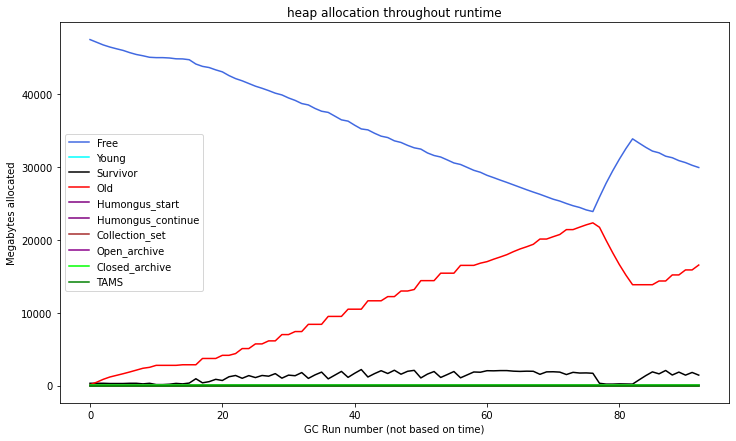

In [8]:
# Set up development extensions to reflect live changes in the workspace
%load_ext autoreload
%autoreload 2

from scripts import updated_plot_data as uplt
from scripts import updated_parse_data as upl
from scripts import transform_data as tfrom
from scripts import plot_heap_allocation as pha # can be combined with other modules in the future. 
from matplotlib import pyplot as plt


path1 = "datasets/cl_1.log"
path2 = "datasets/long_amzn_workload.log"
path3 = "datasets/gc-many/shenandoah_log.log"
# Access a pandas dataframe with timestamps, pauses, and memory changes
d1     = upl.getPauses(logfile = path1)
d2     = upl.getPauses(logfile = path2)
d3     = upl.getPauses(logfile = path3)
# Parse metadata related to garbage collection from the logs
# m1 = upl.getGCMetadata(path1)
# m2 = upl.getGCMetadata(path2)
# m3 = upl.getGCMetadata(path3)

# Easily access the pandas dataframe and remove the timestamps, and pauses. Can be done manually as well using 
# x1 = list(d1["Timestamps_seconds"])
x1, y1 = tfrom.get_combined_xy_pauses(d1)
x2, y2 = tfrom.get_combined_xy_pauses(d2)
x3, y3 = tfrom.get_combined_xy_pauses(d3)

# Create a set of labels & colors to be plotted when comparing the different runtimes against each other
labels = ["G1 Non Tuned", "Run 2", "Shenandoah Run"]
colors = ["k", "b", "r"]

# Create individual labels and color, for single analysis test purposes  
color  = "black"
label  = "First run"

# group timestamp_seconds and pause_miliseconds 
times_seconds  = [x1, x2, x3]
pauses_miliseconds = [y1, y2, y3]
#####################

line_graph  = False  # tested. working
bar_graph   = False   # tested. working
sum_bars    = False # tested. Working
max_bars    = False  # tested. Working
percentiles = False  # tested. Working
trends      = False # tested. Working
metadata    = False   # tested. Working NOT
heatmap     = False  # tested. Working
scatter     = False  # tested. Working
allocation  = True   # tested. Working NOT FO
line_run    = False   # tested. Working

############################################################
if line_graph:
    f, axs = plt.subplots()
    _ = uplt.plot_pauses_line(x1, y1, axs, color, label)
    _ = uplt.compare_pauses_line(times_seconds, pauses_miliseconds, None, colors, labels)
    print("\n")
############################################################
if bar_graph:
    f, axs = plt.subplots()
    _ = uplt.plot_pauses_bar(x1, y1, axs, color, label)
    _ = uplt.compare_pauses_bar(times_seconds, pauses_miliseconds, None, colors, labels)
    print("\n")
############################################################
if percentiles:
    uplt.print_percentiles(list(y1))
    print("\n\n")
    uplt.print_percentiles(list(y1), percentiles = [50, 75, 99.9999])
    print("\n\n")
    uplt.compare_pauses_percentiles(list(pauses_miliseconds), labels=labels)
    print("\n")
############################################################
if trends:
    uplt.print_trends(y1, timestamps=x1)
    print("\n\n") 
    uplt.compare_trends(list(pauses_miliseconds), labels=labels)

############################################################
if heatmap:
    hm, dimensions = tfrom.get_heatmap_data(d1, x_bucket_count = 20, y_bucket_count = 20, x_bucket_duration = 60, y_bucket_duration = 2)
    uplt.plot_heatmap(hm, dimensions, True)
    uplt.plot_heatmap(hm, dimensions, False)
    
############################################################
if line_run:
    f, axs = plt.subplots()
    _ = uplt.plot_paused_and_running_line(x1, y1, axs, color, label)
    uplt.compare_paused_running_line(times_seconds, pauses_miliseconds, None, colors, labels)
    print("\n")
############################################################   
if sum_bars:
    f, axs = plt.subplots()
    timedata, bucketdata = tfrom.get_sum_pauses_n_duration(x1, y1, 10)
    _ = uplt.plot_paused_and_running_line(timedata, bucketdata, axs, color, label, True)
    timelist, bucketlist = tfrom.compare_sum_pauses_n_buckets(times_seconds, pauses_miliseconds, 8)
    _ = uplt.compare_paused_running_line(timelist, bucketlist, None, colors, labels, const_bar_width = True)
    timelist, bucketlist = tfrom.compare_max_pauses_n_duration(times_seconds, pauses_miliseconds, 10)
    _ = uplt.compare_paused_running_line(timelist, bucketlist, None, colors, labels, const_bar_width = True)
    print("\n")
############################################################
if metadata:
    uplt.print_metadata([m1, m2, m3], labels, 20)
    print("\n")
############################################################
if scatter:
    fix, axs = plt.subplots()
    uplt.plot_pauses_scatter(x1, y1, axs, "Red", "Hello World!")
    _ = uplt.comparrison_scatter(times_seconds, pauses_miliseconds, None, colors, labels)
    print("\n")
############################################################
if allocation:
#     before_gc, after_gc, max_heap, unit = tfrom.get_heap_occupancy(d1)
#     graph = pha.plot_heap_occupancy(x1, before_gc, unit, 2, "G", label = "Usage before gc")
#     _ = pha.plot_heap_occupancy(x1, after_gc, unit, 2, "G", axs = graph, label = "Usage after gc", plot_max=False)
#     graph = None
#     graph = pha.plot_heap_occupancy_percentage(x1, before_gc, unit, 2, "G", label = "Usage before gc")
#     graph = pha.plot_heap_occupancy_percentage(x1, after_gc, unit, 2, "G", label = "Usage After gc", axs = graph, plot_max = False)
#     graph = pha.plot_heap_occupancy_percentage(x1, max_heap, unit, 2, "G", label = "Current max heapsize", axs = graph, plot_max = False)
#     allo = upl.getHeapAllocation(path1)
    allo2 = upl.getHeapAllocation("datasets/gc.log", robust = True)
    _ = pha.plot_heap_regions(allo2, region_size = 16) # tested, working
#     _ = pha.plot_heap_regions(allo, region_size = 16)  # tested, working
#     d3 = upl.getConcurrentPauses(path3)
#     before_gc, after_gc, max_heap, unit = tfrom.get_heap_occupancy(d3)
#     _ = pha.plot_heap_occupancy_percentage(x3, max_heap, unit, 2, "G", label = "Shenandoah max heapsize", axs = None, plot_max = False)
#     _ = pha.plot_heap_occupancy(x3, max_heap, unit, 2, "G", label = "Current max heapsize", axs = None, plot_max = False)

